### Q1 Load the data from supplied data file. Select the first 500 observations/ samples from the dataset. Print the data dimension.

In [1]:
import pandas as pd

data1 = pd.read_excel ('hypothyroid.xlsx') #reading excel file 
data1.head(500) #subset of 500 data
df1 = data1.head(500)
df1

,age,sex,on thyroxine,pregnant,I131 treatment,query hyperthyroid,TSH,T3,TT4,FTI,binaryClass
0,41,F,f,f,f,f,1.3,2.5,125,109,P
1,23,F,f,f,f,f,4.1,2,102,?,P
2,46,M,f,f,f,f,0.98,?,109,120,P
3,70,F,t,f,f,f,0.16,1.9,175,?,P
4,70,F,f,f,f,f,0.72,1.2,61,70,P
...,...,...,...,...,...,...,...,...,...,...,...
495,46,F,f,f,f,f,?,?,93,102,P
496,45,F,f,f,f,f,0.02,1.4,144,?,P
497,82,M,f,f,f,f,0.15,1.4,133,134,P
498,55,F,f,f,f,f,11,1.5,144,116,N


In [2]:
df1.shape  #dimensions of the dataset 

(500, 11)

### Q2 Continue from question 1. Display the number of rows and their indices that have missing data in one or more cells. Now, replace the missing data by the lowest value of the corresponding feature if it is a continuous variable. In case of categorical variable, remove the sample. Print the median values of all features before and after replacing missing data.

In [3]:
import numpy as np  #numpy package from the libraries
hypodis = df1.replace("?", np.nan) #replacing the ? with NaN
hypodis

,age,sex,on thyroxine,pregnant,I131 treatment,query hyperthyroid,TSH,T3,TT4,FTI,binaryClass
0,41,F,f,f,f,f,1.30,2.5,125.0,109.0,P
1,23,F,f,f,f,f,4.10,2.0,102.0,NaN,P
2,46,M,f,f,f,f,0.98,NaN,109.0,120.0,P
3,70,F,t,f,f,f,0.16,1.9,175.0,NaN,P
4,70,F,f,f,f,f,0.72,1.2,61.0,70.0,P
...,...,...,...,...,...,...,...,...,...,...,...
495,46,F,f,f,f,f,NaN,NaN,93.0,102.0,P
496,45,F,f,f,f,f,0.02,1.4,144.0,NaN,P
497,82,M,f,f,f,f,0.15,1.4,133.0,134.0,P
498,55,F,f,f,f,f,11.00,1.5,144.0,116.0,N


In [4]:
hypodis.isnull().sum() #number of Null values 

age                     0
sex                    22
on thyroxine            0
pregnant                0
I131 treatment          0
query hyperthyroid      0
TSH                    48
T3                    100
TT4                    25
FTI                    39
binaryClass             0
dtype: int64

In [5]:
hypodis.median(numeric_only = True) #Before replacing missing values - print median values 

age     55.0
TSH      1.4
T3       1.9
TT4    103.0
FTI    108.0
dtype: float64

In [6]:
hypodis.dropna(how = "any", subset = ['sex']) #Gender is categorical variable - we drop the null values
hypo_1 = hypodis.dropna(how = "any", subset = ['sex'])
hypo_1


hypo_1['TSH'] = hypo_1['TSH'].fillna(hypo_1['TSH'].min()) #TSH variable is a float variable - so we replace null values with minimum values 


hypo_1['T3'] = hypo_1['T3'].fillna(hypo_1['T3'].min()) #replace T3 null values with min. values


hypo_1['TT4'] = hypo_1['TT4'].fillna(hypo_1['TT4'].min()) #same as above


hypo_1['FTI'] = hypo_1['FTI'].fillna(hypo_1['FTI'].min()) #replace FTI null values with min. vals 

/var/folders/j0/q9zz5mhj0t92pnl_m13g270w0000gn/T/ipykernel_1495/3322140265.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hypo_1['TSH'] = hypo_1['TSH'].fillna(hypo_1['TSH'].min()) #TSH variable is a float variable - so we replace null values with minimum values
/var/folders/j0/q9zz5mhj0t92pnl_m13g270w0000gn/T/ipykernel_1495/3322140265.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hypo_1['T3'] = hypo_1['T3'].fillna(hypo_1['T3'].min()) #replace T3 null values with min. values
/var/folders/j0/q9zz5m

In [7]:
hypo_1.isnull().sum() #calculating the null values 

age                   0
sex                   0
on thyroxine          0
pregnant              0
I131 treatment        0
query hyperthyroid    0
TSH                   0
T3                    0
TT4                   0
FTI                   0
binaryClass           0
dtype: int64

In [8]:
hypo_1.median(numeric_only = True) #After replacing missing values

age     55.0
TSH      1.1
T3       1.7
TT4    102.0
FTI    106.0
dtype: float64

### Q3 Continue from question 2. Is there any change in data type? If yes, convert them back to appropriate data types. Print all variables with corresponding data type.

In [9]:
hypo_1.dtypes #data type 

age                     int64
sex                    object
on thyroxine           object
pregnant               object
I131 treatment         object
query hyperthyroid     object
TSH                   float64
T3                    float64
TT4                   float64
FTI                   float64
binaryClass            object
dtype: object

Comment - When we run the code of reading the data, it reads as the above datatypes. On thyroxine, pregnant, I131 treatment and query hyperthyroid features have all changed from boolean type to object datatype. The boolean datatype involves True and False values and the object datatype is a string. Whereas, TT4 and FTI have changed from integer to float data type.Therefore we convert them back to original datatypes for ease of coding and output. 

In [10]:
hypo_1['on thyroxine'] = hypo_1['on thyroxine'].map({'t':True, 'f':False})  #changing on thyroxine to the boolean type 
hypo_1['pregnant'] = hypo_1['pregnant'].map({'t':True, 'f':False}) #converting pregnant 
hypo_1['I131 treatment'] = hypo_1['I131 treatment'].map({'t':True, 'f':False}) #convert I131 treatment to bool
hypo_1['query hyperthyroid'] = hypo_1['query hyperthyroid'].map({'t':True, 'f':False}) 

hypo_1['TT4'] = hypo_1['TT4'].astype(int) #transforming to integer type 
hypo_1['FTI'] = hypo_1['FTI'].astype(int)

/var/folders/j0/q9zz5mhj0t92pnl_m13g270w0000gn/T/ipykernel_13517/3926292493.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hypo_1['on thyroxine'] = hypo_1['on thyroxine'].map({'t':True, 'f':False})
/var/folders/j0/q9zz5mhj0t92pnl_m13g270w0000gn/T/ipykernel_13517/3926292493.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hypo_1['pregnant'] = hypo_1['pregnant'].map({'t':True, 'f':False})
/var/folders/j0/q9zz5mhj0t92pnl_m13g270w0000gn/T/ipykernel_13517/3926292493.py:3: SettingWithCopyWarning: 
A value

In [11]:
hypo_1

,age,sex,on thyroxine,pregnant,I131 treatment,query hyperthyroid,TSH,T3,TT4,FTI,binaryClass
0,41,F,False,False,False,False,1.300,2.50,125,109,P
1,23,F,False,False,False,False,4.100,2.00,102,8,P
2,46,M,False,False,False,False,0.980,0.05,109,120,P
3,70,F,True,False,False,False,0.160,1.90,175,8,P
4,70,F,False,False,False,False,0.720,1.20,61,70,P
...,...,...,...,...,...,...,...,...,...,...,...
495,46,F,False,False,False,False,0.005,0.05,93,102,P
496,45,F,False,False,False,False,0.020,1.40,144,8,P
497,82,M,False,False,False,False,0.150,1.40,133,134,P
498,55,F,False,False,False,False,11.000,1.50,144,116,N


In [12]:
hypo_1.isnull().sum()

age                   0
sex                   0
on thyroxine          0
pregnant              0
I131 treatment        0
query hyperthyroid    0
TSH                   0
T3                    0
TT4                   0
FTI                   0
binaryClass           0
dtype: int64

In [13]:
hypo_1.dtypes #Transformed datatypes

age                     int64
sex                    object
on thyroxine             bool
pregnant                 bool
I131 treatment           bool
query hyperthyroid       bool
TSH                   float64
T3                    float64
TT4                     int64
FTI                     int64
binaryClass            object
dtype: object

### Q4 Continue from question 3. Print the total numbers and ratio of male and female patients who are receiving I131 treatment.

In [14]:
hypo_treat = hypo_1[["sex", "I131 treatment"]]
hypo_treat

,sex,I131 treatment
0,F,False
1,F,False
2,M,False
3,F,False
4,F,False
...,...,...
495,F,False
496,F,False
497,M,False
498,F,False


In [15]:
hypo_treat.groupby("sex").sum()

,I131 treatment
sex,
F,0
M,2


In [16]:
f = 0 
m = 2
ratio = f/m
print(ratio)

0.0


The ratio between females to males is 0. 


### Q5 Continue from question 3. Print the average TSH and T3 with the patient with Hypothyroid problem. Please report the pattern found in the result, if any.

In [17]:
hypo_2 = hypo_1[["TSH", "binaryClass", "T3"]] #new dataframe 
hypo_2 

,TSH,binaryClass,T3
0,1.300,P,2.50
1,4.100,P,2.00
2,0.980,P,0.05
3,0.160,P,1.90
4,0.720,P,1.20
...,...,...,...
495,0.005,P,0.05
496,0.020,P,1.40
497,0.150,P,1.40
498,11.000,N,1.50


In [18]:
hypo_2.groupby("binaryClass").mean().round(4) #round to 4 decimal places 

,TSH,T3
binaryClass,,
N,31.7875,1.1012
P,1.5830,1.5854


In the table above, we can observe that patients with hypothyroid disease have a TSH level of 1.58mU, which is similar to the T3 hormone level of 1.58ng. A 1.58 level of T3 implies an overactive thyroid since the normal range is (0.2-0.5 ng/dl).
Contrary to patients with no hypothyroid disease, have 31.78mU TSH indicating a high thyroid stimulating hormone production. Whereas the T3 level for these patients comes to around 1.101ng (an overactive thyroid production).
Lastly, we can say that the T3 levels for both N and P patients fall under the similar range. 


### Q6 Continue from question 3. Print the average TSH and T3 with the patient with Hyperthyroid problem. Please report the pattern found in the result, if any.

In [19]:
hypo_3 = hypo_1[["TSH", "query hyperthyroid", "T3"]] 
hypo_3

,TSH,query hyperthyroid,T3
0,1.300,False,2.50
1,4.100,False,2.00
2,0.980,False,0.05
3,0.160,False,1.90
4,0.720,False,1.20
...,...,...,...
495,0.005,False,0.05
496,0.020,False,1.40
497,0.150,False,1.40
498,11.000,False,1.50


In [20]:
hypo_3.groupby("query hyperthyroid").mean().round(4)

,TSH,T3
query hyperthyroid,,
False,4.1459,1.5137
True,3.5828,2.0100


We can observe from the table above that the patients with no hyperthyroidism condition have the TSH as 4.14mU - slightly above the range of TSH standard range. Similarly, T3 level comes to around 1.51ng - an overactive thyroid. Whereas, for True, i.e, patients which have hyper thyroidism have slightly low TSH production of 3.52mU as compared to non-hyperthyroid patients. However, we can see that T3 level is 2.01ng, a higher production level of hormone thyroxine which makes sense since there is hyper production.

### Q7 Print the percentage of pregnant patients at risk of Hypothyroid disease.

In [21]:
hypo_1.groupby('pregnant')['pregnant'].count() #grouping by pregnant field 

pregnant
False    470
True       8
Name: pregnant, dtype: int64

In [22]:
hypo_1.loc[:,['pregnant', 'binaryClass']].groupby(['pregnant', 'binaryClass'])['binaryClass'].count()

pregnant  binaryClass
False     N               40
          P              430
True      P                8
Name: binaryClass, dtype: int64

In [23]:
x = 8
y = 8
percentage = (x/y)*100
percentage

100.0

Therefore, the percentage of pregnant patients having hypothyroid disease is 100%. 

### Q8 Calculate and print the average TSH and TT4 for pregnant patient at risk of Hypothyroid disease.

In [24]:
hypo_4 = hypo_1[["TSH", "pregnant", "TT4", "binaryClass"]]
hypo_4

,TSH,pregnant,TT4,binaryClass
0,1.300,False,125,P
1,4.100,False,102,P
2,0.980,False,109,P
3,0.160,False,175,P
4,0.720,False,61,P
...,...,...,...,...
495,0.005,False,93,P
496,0.020,False,144,P
497,0.150,False,133,P
498,11.000,False,144,N


In [25]:
#Source code - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html
hypo_4.groupby(["pregnant", "binaryClass"]).mean().round(4)

TSH       TT4
pregnant binaryClass                   
False    N            31.7875   71.6250
         P             1.6036  104.3884
True     P             0.4775  130.3750

### Q9 Calculate and print the average FTI and TT4 for pregnant patient who are receiving I131 treatment and are at risk of Hyperthyroid disease.

In [26]:
hypo_5 = hypo_1[["FTI", "pregnant", "TT4", "query hyperthyroid", "I131 treatment"]]
hypo_5

,FTI,pregnant,TT4,query hyperthyroid,I131 treatment
0,109,False,125,False,False
1,8,False,102,False,False
2,120,False,109,False,False
3,8,False,175,False,False
4,70,False,61,False,False
...,...,...,...,...,...
495,102,False,93,False,False
496,8,False,144,False,False
497,134,False,133,False,False
498,116,False,144,False,False


In [27]:
hypo_5.groupby(["pregnant", "query hyperthyroid","I131 treatment" ]).mean().round(4)

FTI       TT4
pregnant query hyperthyroid I131 treatment                    
False    False              False           101.5656  101.0814
                            True            105.0000  107.0000
         True               False           106.9231  108.8846
                            True            143.0000  136.0000
True     False              False            87.0000  135.4000
         True               False            93.0000  122.0000

In [28]:
#None of the pregnant patients are receiving I131 treatment - mean of FTI and TT4. 

### Q10 Create and print a dataframe of the FTI, T3 and TSH levels for different age groups (based on 10 years interval).


In [29]:
#Source code : https://pandas.pydata.org/docs/reference/api/pandas.cut.html
#bin range = 10 years interval
hypo_1["Age group"] = pd.cut(x= hypo_1['age'], bins = [0,10,20,30,40,50,60,70,80,90])

/var/folders/j0/q9zz5mhj0t92pnl_m13g270w0000gn/T/ipykernel_13517/1862256327.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hypo_1["Age group"] = pd.cut(x= hypo_1['age'], bins = [0,10,20,30,40,50,60,70,80,90])


In [30]:
hypo_1

,age,sex,on thyroxine,pregnant,I131 treatment,query hyperthyroid,TSH,T3,TT4,FTI,binaryClass,Age group
0,41,F,False,False,False,False,1.300,2.50,125,109,P,"(40, 50]"
1,23,F,False,False,False,False,4.100,2.00,102,8,P,"(20, 30]"
2,46,M,False,False,False,False,0.980,0.05,109,120,P,"(40, 50]"
3,70,F,True,False,False,False,0.160,1.90,175,8,P,"(60, 70]"
4,70,F,False,False,False,False,0.720,1.20,61,70,P,"(60, 70]"
...,...,...,...,...,...,...,...,...,...,...,...,...
495,46,F,False,False,False,False,0.005,0.05,93,102,P,"(40, 50]"
496,45,F,False,False,False,False,0.020,1.40,144,8,P,"(40, 50]"
497,82,M,False,False,False,False,0.150,1.40,133,134,P,"(80, 90]"
498,55,F,False,False,False,False,11.000,1.50,144,116,N,"(50, 60]"


In [31]:
dataf = hypo_1[["FTI", "T3", "TSH", "Age group"]]
dataf

,FTI,T3,TSH,Age group
0,109,2.50,1.300,"(40, 50]"
1,8,2.00,4.100,"(20, 30]"
2,120,0.05,0.980,"(40, 50]"
3,8,1.90,0.160,"(60, 70]"
4,70,1.20,0.720,"(60, 70]"
...,...,...,...,...
495,102,0.05,0.005,"(40, 50]"
496,8,1.40,0.020,"(40, 50]"
497,134,1.40,0.150,"(80, 90]"
498,116,1.50,11.000,"(50, 60]"


### Q11. Continue from question 3. Find the average T3 and T4 level of across gender for each age group (based on 10 years interval). Please explain the results.

In [32]:
disease = hypo_1[["T3", "TT4", "Age group", "sex"]]
disease

,T3,TT4,Age group,sex
0,2.50,125,"(40, 50]",F
1,2.00,102,"(20, 30]",F
2,0.05,109,"(40, 50]",M
3,1.90,175,"(60, 70]",F
4,1.20,61,"(60, 70]",F
...,...,...,...,...
495,0.05,93,"(40, 50]",F
496,1.40,144,"(40, 50]",F
497,1.40,133,"(80, 90]",M
498,1.50,144,"(50, 60]",F


In [33]:
disease.groupby(["Age group", "sex"]).mean().round(4)

T3       TT4
Age group sex                  
(0, 10]   F       NaN       NaN
          M    1.9625  109.7500
(10, 20]  F    1.4708  109.6667
          M    2.1000  110.4000
(20, 30]  F    1.4600  102.9778
          M    2.2600  116.8000
(30, 40]  F    1.7977  110.2093
          M    1.9900  106.6000
(40, 50]  F    1.5425   99.2000
          M    1.3081   95.4194
(50, 60]  F    1.5265  100.1837
          M    1.6360   99.9200
(60, 70]  F    1.3464  100.7500
          M    1.4456   92.0882
(70, 80]  F    1.4410  105.3000
          M    1.5050   92.2000
(80, 90]  F    1.7844  113.6875
          M    0.9312  101.0000

From the table above, we can see that between the age range of 10-20 years, the T4 test, i.e., the thyroxine hormone level is 109.6 for females whereas for males, it is a slightly higher range of 110.4, however, they fall well within the range of 57-148nmol range. Moreover,there is a mild variation between the TT4 levels. For instance, as the age range goes from 20-30 years to 30-40 years,the hormone production increases from 102 to 110nmol for females, contrary to a decrease in the thyroxine level of males. Regarding T3 for both males and females, they fall well over the standard range, for example, in the 70-80 year age range, the thyroxine level for females is 1.44 and males is 1.50.To point out more, males have a higher T3 level of 1.99 aged between 30-40 years.

### Q12. Draw two scatter plots of FTI level, one against T4 and another against TSH rate. Draw them in two subplots of the same plot.


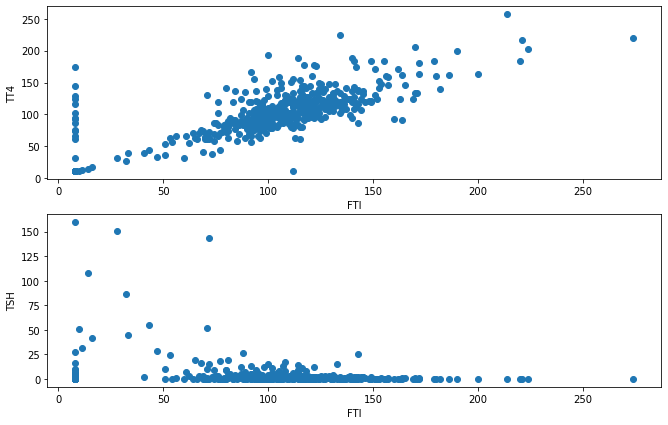

In [34]:
#creating two subplots 
import matplotlib.pyplot as plt

#first plot of FTI vs TT4
fig, ax = plt.subplots(2, figsize=(11, 7))
ax[0].scatter(x = hypo_1['FTI'], y = hypo_1['TT4'])
ax[0].set_xlabel("FTI")
ax[0].set_ylabel("TT4")

#second plot of FTI vs TSH
ax[1].scatter(x = hypo_1['FTI'], y = hypo_1['TSH'])
ax[1].set_xlabel("FTI")
ax[1].set_ylabel("TSH")

#printing the plots
plt.show()

### Q13 Visualize the number of pregnant for each Hyper and Hypo disease group using bar plot. Explain the graph base on your observation.


In [35]:
x = hypo_1[["pregnant", "query hyperthyroid", "Age group", "sex"]]
x

,pregnant,query hyperthyroid,Age group,sex
0,False,False,"(40, 50]",F
1,False,False,"(20, 30]",F
2,False,False,"(40, 50]",M
3,False,False,"(60, 70]",F
4,False,False,"(60, 70]",F
...,...,...,...,...
495,False,False,"(40, 50]",F
496,False,False,"(40, 50]",F
497,False,False,"(80, 90]",M
498,False,False,"(50, 60]",F


In [36]:
thy = hypo_1[hypo_1['pregnant'] ==True]
thy

NameError: name 'hypo1' is not defined

In [ ]:
u =['Hyperthyroid patient', 'Hypothyroid patient']
w =[3,8]
plt.bar(u,w)

From the above graph we can observe that there are 3 hyperthyroid patients who are pregnant as compared to  8 hypothyroid patients being pregnant. In order to calculate this, we calculate the number of pregnant patients who have the binary class as P (true - if hypothyroidism). This indicates, there are less females suffering from hyperthyroidism. 

### Q14 Continue from question 3. Draw a group bar diagram of T3, T4, TSH and total number of hypo patients, based on age groups. Explain your observation from the graph.

In [ ]:
thyroid = hypo_1[["T3","TT4","TSH","Age group","binaryClass"]]
thyroid

### Q15. Calculate the number of male and female patients affected by hyper disease in each group.

In [ ]:
hypodisease = hypo_1[["sex", "query hyperthyroid"]]
hypodisease

In [ ]:
p = hypodisease.groupby(['sex', 'query hyperthyroid'])['sex'].count()
p

There are 22 female patients affected by hyperthyroid and 8 male patients affected by hyperthyroid. 